# Compare evaluation files at Col de Porte
- Morin et al. (2012): https://doi.pangaea.de/10.1594/PANGAEA.774249 (Downloaded: 15/11/2023) -> `/home/lalandmi/Dropbox/data/SnowMIP`
- Menard et al. (2019) : https://essd.copernicus.org/articles/11/865/2019/ (data: https://doi.org/10.1594/PANGAEA.897575; downloaded: 22/11/2023) -> `/home/lalandmi/Dropbox/data/ESM-SnowMIP_all`
- Lejeune et al. (2029): https://essd.copernicus.org/articles/11/71/2019/ (data: https://doi.osug.fr/public/CRYOBSCLIM_CDP/CRYOBSCLIM.CDP.2018.html; dowloaded: 08/12/2023) -> `/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/CRYOBSCLIM_CDP`

In [3]:
# Env: sc2_v0
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as pplt # New plot library (https://proplot.readthedocs.io/en/latest/)
pplt.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)
import calendar
import os

In [4]:
path_morin2012 = '/home/lalandmi/Dropbox/data/SnowMIP/evaluation/FR-Cdp/Morin_2012/datasets'
path_menard2019 = '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all'
path_lejeune2019 = '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/CRYOBSCLIM_CDP'

# Morin2012

## Daily eval

In [5]:
df_d_eval_morin2012 = pd.read_csv(path_morin2012+'/CDP_daily_eval.tab', skiprows=23, delimiter='\t', index_col=0)
df_d_eval_morin2012.index = pd.to_datetime(df_d_eval_morin2012.index)
df_d_eval_morin2012

Snow thick [m] (automated measurement, Ultra-...)  \
Date/Time                                                       
1993-09-21                                                0.0   
1993-09-22                                                0.0   
1993-09-23                                                0.0   
1993-09-24                                                0.0   
1993-09-25                                                0.0   
...                                                       ...   
2011-06-08                                                0.0   
2011-06-09                                                0.0   
2011-06-10                                                NaN   
2011-06-11                                                NaN   
2011-06-12                                                NaN   

            Snow thick [m] (pit, Ruler stick)  \
Date/Time                                       
1993-09-21                                NaN   
1993-09-22                                NaN   
1993-09-23                                NaN   
1993-09-24                                NaN   
1993-09-25                                NaN   
...                                       ...   
2011-06-08                                NaN   
2011-06-09                                NaN   
2011-06-10                                NaN   
2011-06-11                                NaN   
2011-06-12                                NaN   

            Snow thick [m] (pit south, Ruler stick)  \
Date/Time                                             
1993-09-21                                      NaN   
1993-09-22                                      NaN   
1993-09-23                                      NaN   
1993-09-24                                      NaN   
1993-09-25                                      NaN   
...                                             ...   
2011-06-08                                      NaN   
2011-06-09                                      NaN   
2011-06-10                                      NaN   
2011-06-11                                      NaN   
2011-06-12                                      NaN   

            Snow thick [m] (pit north, Ruler stick)  \
Date/Time                                             
1993-09-21                                      NaN   
1993-09-22                                      NaN   
1993-09-23                                      NaN   
1993-09-24                                      NaN   
1993-09-25                                      NaN   
...                                             ...   
2011-06-08                                      NaN   
2011-06-09                                      NaN   
2011-06-10                                      NaN   
2011-06-11                                      NaN   
2011-06-12                                      NaN   

            SWE [kg/m**2] (Cosmic Ray Counter, NRC)  \
Date/Time                                             
1993-09-21                                      NaN   
1993-09-22                                      NaN   
1993-09-23                                      NaN   
1993-09-24                                      NaN   
1993-09-25                                      NaN   
...                                             ...   
2011-06-08                                      0.0   
2011-06-09                                      0.0   
2011-06-10                                      NaN   
2011-06-11                                      NaN   
2011-06-12                                      NaN   

            SWE [kg/m**2] (pit, Calculated from weight o...)  \
Date/Time                                                      
1993-09-21                                               NaN   
1993-09-22                                               NaN   
1993-09-23                                               NaN   
1993-09-24                                               NaN

In [6]:
%matplotlib widget
df_d_eval_morin2012.plot()

<AxesSubplot:xlabel='Date/Time'>

In [7]:
ds_d_eval_morin2012 = df_d_eval_morin2012.to_xarray()
ds_d_eval_morin2012 = ds_d_eval_morin2012.rename({'Date/Time': 'time'})
ds_d_eval_morin2012

<xarray.Dataset>
Dimensions:                                            (time: 5159)
Coordinates:
  * time                                               (time) datetime64[ns] ...
Data variables:
    Snow thick [m] (automated measurement, Ultra-...)  (time) float64 0.0 ......
    Snow thick [m] (pit, Ruler stick)                  (time) float64 nan ......
    Snow thick [m] (pit south, Ruler stick)            (time) float64 nan ......
    Snow thick [m] (pit north, Ruler stick)            (time) float64 nan ......
    SWE [kg/m**2] (Cosmic Ray Counter, NRC)            (time) float64 nan ......
    SWE [kg/m**2] (pit, Calculated from weight o...)   (time) float64 nan ......
    SWE [kg/m**2] (pit south, Calculated from we...)   (time) float64 nan ......
    SWE [kg/m**2] (pit north, Calculated from we...)   (time) float64 nan ......
    Runoff [kg/m**2/day] (Lysimeter, 5 m**2)           (time) float64 nan ......
    Runoff [kg/m**2/day] (Lysimeter, 1 m**2)           (time) float64 nan ......
    Albedo [%] (Calculated)                            (time) float64 nan ......

In [8]:
list(ds_d_eval_morin2012.keys())

['Snow thick [m] (automated measurement, Ultra-...)',
 'Snow thick [m] (pit, Ruler stick)',
 'Snow thick [m] (pit south, Ruler stick)',
 'Snow thick [m] (pit north, Ruler stick)',
 'SWE [kg/m**2] (Cosmic Ray Counter, NRC)',
 'SWE [kg/m**2] (pit, Calculated from weight o...)',
 'SWE [kg/m**2] (pit south, Calculated from we...)',
 'SWE [kg/m**2] (pit north, Calculated from we...)',
 'Runoff [kg/m**2/day] (Lysimeter, 5 m**2)',
 'Runoff [kg/m**2/day] (Lysimeter, 1 m**2)',
 'Albedo [%] (Calculated)']

In [14]:
%matplotlib inline
fig, axs = pplt.subplots(ncols=1, nrows=4, refaspect=5, refwidth=8, sharey=0)

for var in list(ds_d_eval_morin2012.keys())[0:4]: axs[0].plot(ds_d_eval_morin2012[var], marker='.', labels=var[15:])
axs[0].format(ylabel='Snow Depth (m)')

for var in list(ds_d_eval_morin2012.keys())[4:8]: axs[1].plot(ds_d_eval_morin2012[var], marker='.', labels=var[14:])
axs[1].format(ylabel='Snow Water Equivalent (mm)')

for var in list(ds_d_eval_morin2012.keys())[8:10]: axs[2].plot(ds_d_eval_morin2012[var], marker='.', labels=var[21:])
axs[2].format(ylabel='Runoff (mm/day)')

for var in list(ds_d_eval_morin2012.keys())[10:]: axs[3].plot(ds_d_eval_morin2012[var], marker='.', labels=var[11:])
axs[3].format(ylabel='Albedo')

for ax in axs: ax.legend(loc='ur')

fig.suptitle('Col de Porte')

Text(0.5, 0.98, 'Col de Porte')

Text(0.5, 0.98, 'Col de Porte')

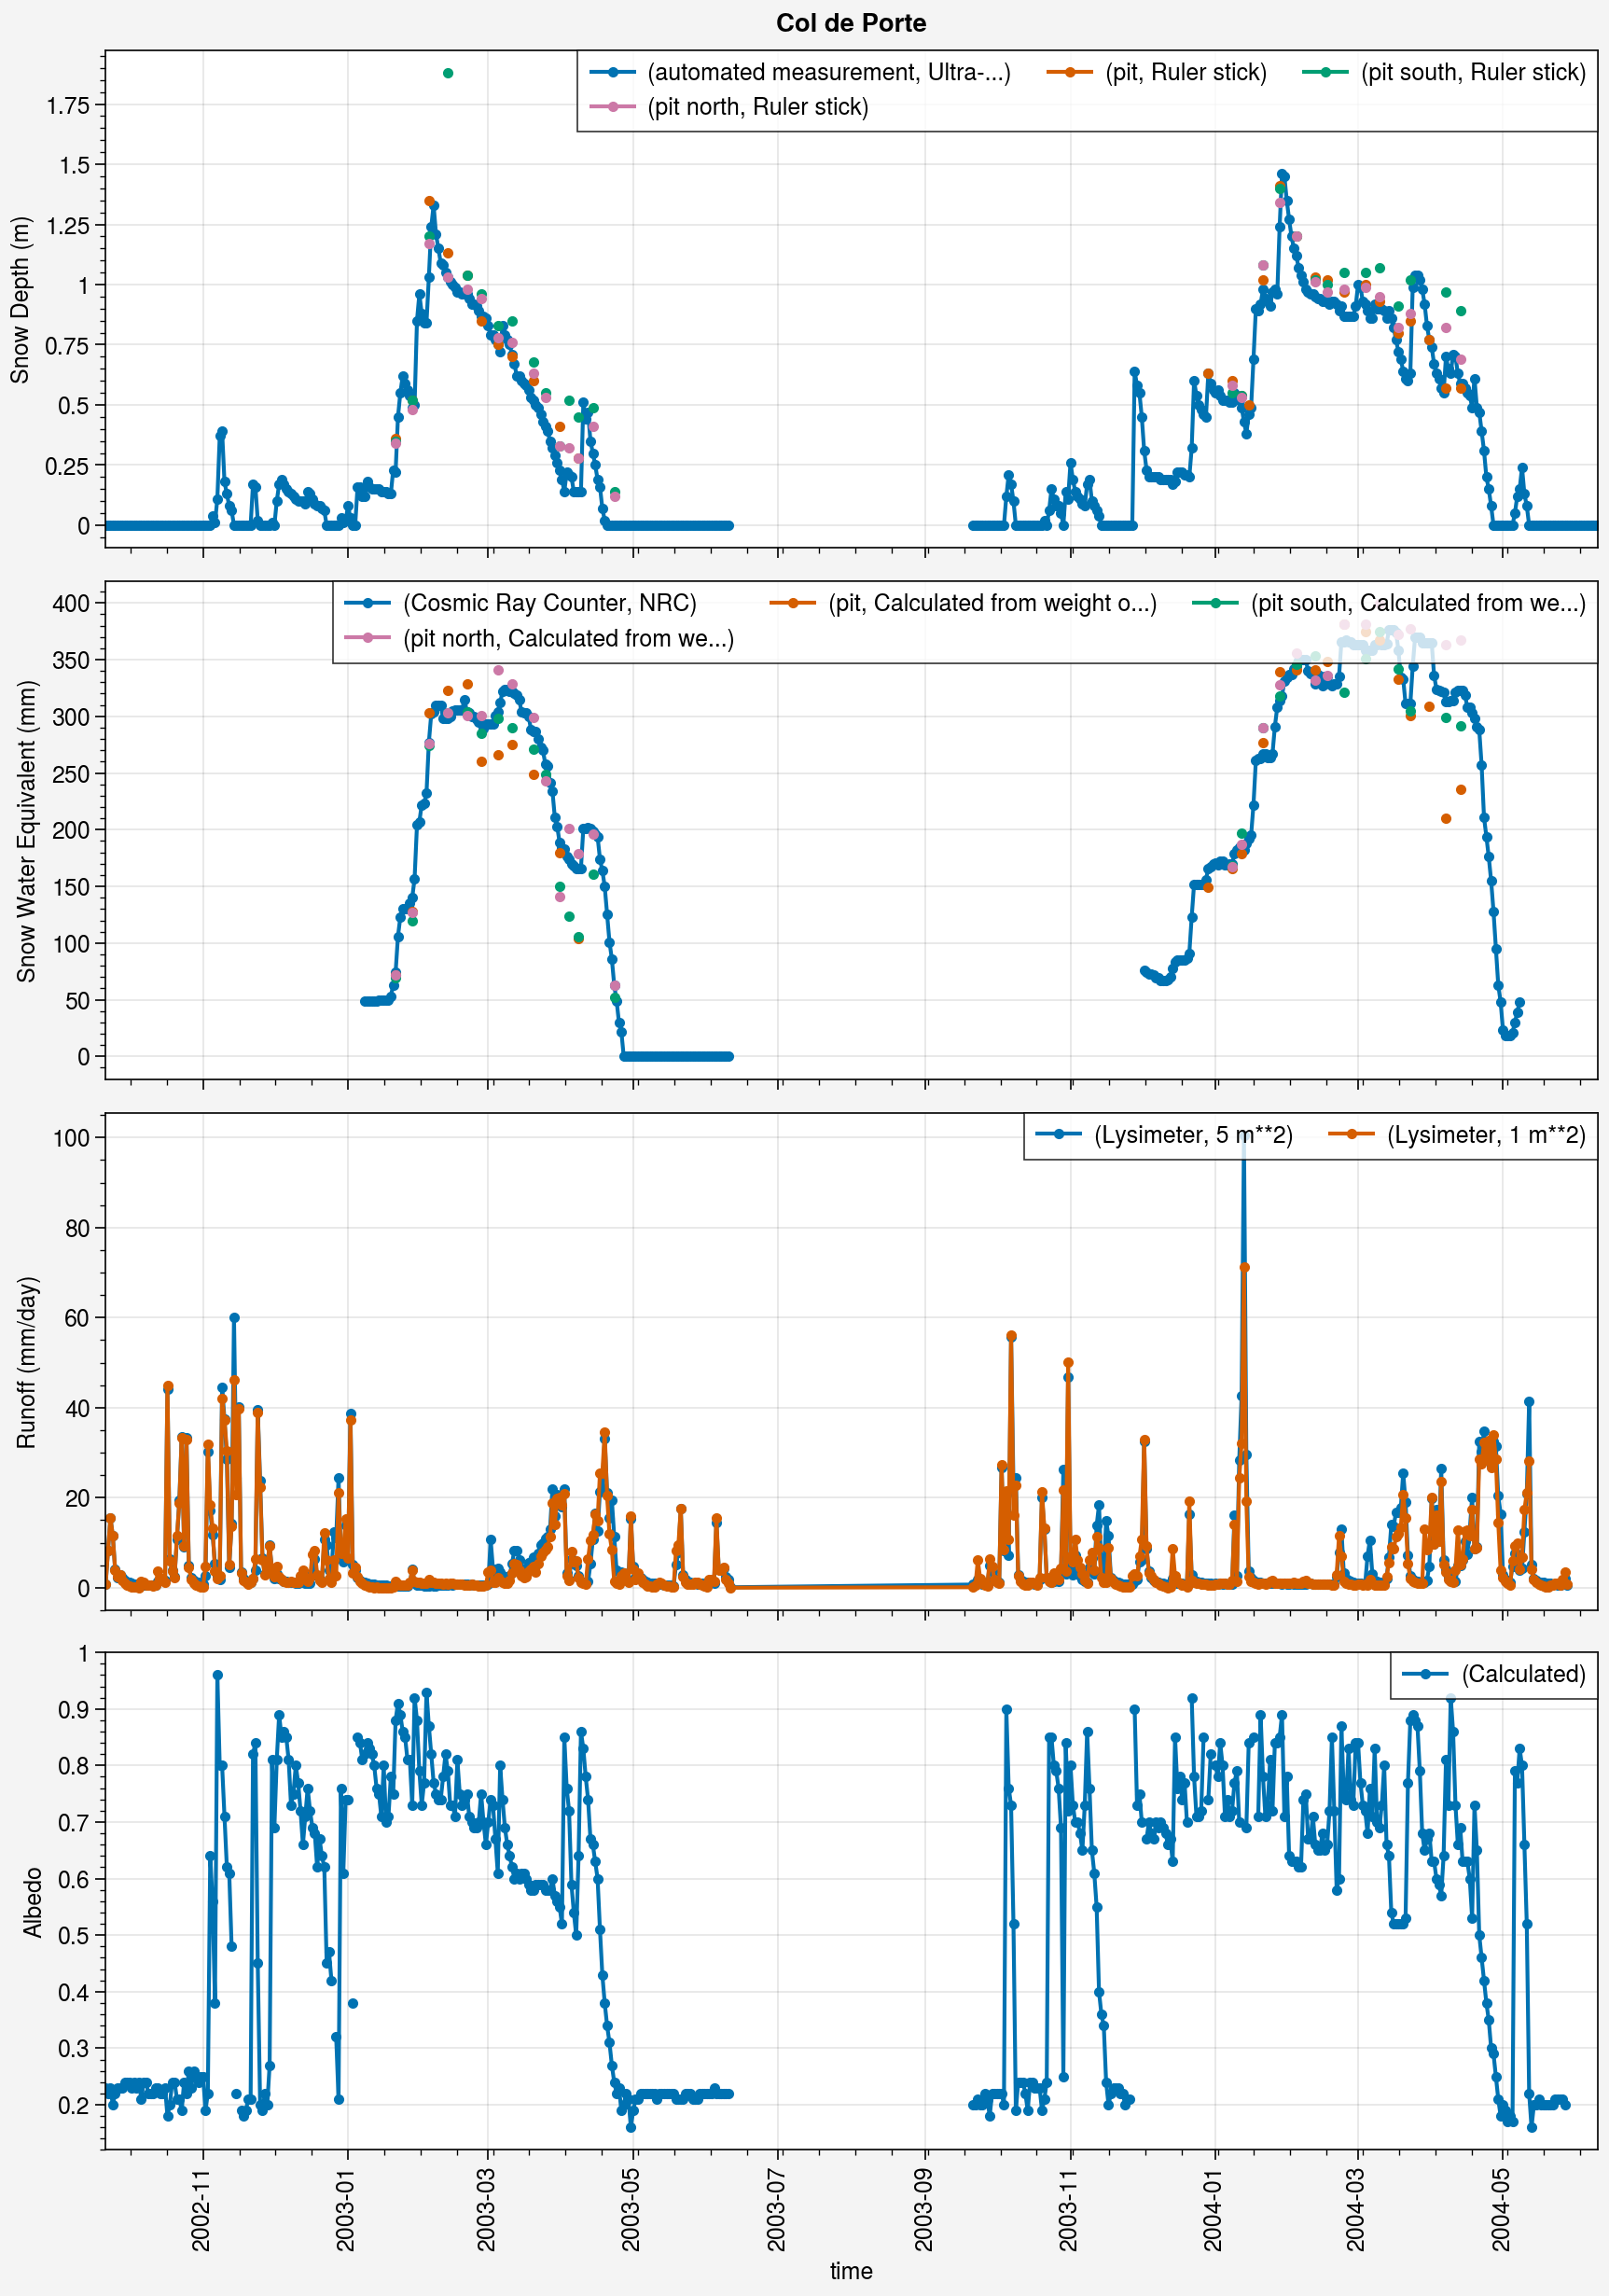

In [15]:
fig, axs = pplt.subplots(ncols=1, nrows=4, refaspect=3, refwidth=8, sharey=0)

start = '2002-09'
end = '2004-07'

for var in list(ds_d_eval_morin2012.keys())[0:4]: axs[0].plot(ds_d_eval_morin2012[var].sel(time=slice(start,end)), marker='.', labels=var[15:])
axs[0].format(ylabel='Snow Depth (m)')

for var in list(ds_d_eval_morin2012.keys())[4:8]: axs[1].plot(ds_d_eval_morin2012[var].sel(time=slice(start,end)), marker='.', labels=var[14:])
axs[1].format(ylabel='Snow Water Equivalent (mm)')

for var in list(ds_d_eval_morin2012.keys())[8:10]: axs[2].plot(ds_d_eval_morin2012[var].sel(time=slice(start,end)), marker='.', labels=var[21:])
axs[2].format(ylabel='Runoff (mm/day)')

for var in list(ds_d_eval_morin2012.keys())[10:]: axs[3].plot(ds_d_eval_morin2012[var].sel(time=slice(start,end)), marker='.', labels=var[11:])
axs[3].format(ylabel='Albedo')

for ax in axs: ax.legend(loc='ur')

fig.suptitle('Col de Porte')

## Hourly eval

In [16]:
df_h_eval_morin2012 = pd.read_csv(path_morin2012+'/CDP_hor_eval.tab', skiprows=20, delimiter='\t', index_col=0)
df_h_eval_morin2012.index = pd.to_datetime(df_h_eval_morin2012.index)
ds_h_eval_morin2012 = df_h_eval_morin2012.to_xarray()
ds_h_eval_morin2012 = ds_h_eval_morin2012.rename({'Date/Time': 'time'})
ds_h_eval_morin2012

<xarray.Dataset>
Dimensions:                                                       (time: 119109)
Coordinates:
  * time                                                          (time) datetime64[ns] ...
Data variables:
    Snow thick [m] (automated measurement, Ultra-...)             (time) float64 ...
    t [°C] (at snow surface, upward IR ra...)                     (time) float64 ...
    Runoff [kg/m**2/day] (Lysimeter, 1 m**2)                      (time) float64 ...
    Runoff [kg/m**2/day] (Lysimeter, 5 m**2)                      (time) float64 ...
    Ground heat flux [W/m**2] (replicate 1, Heat-flux plate,...)  (time) float64 ...
    Ground heat flux [W/m**2] (replicate 2, Heat-flux plate,...)  (time) float64 ...
    Ground heat flux [W/m**2] (replicate 3, Heat-flux plate,...)  (time) float64 ...
    Albedo [%] (Calculated)                                       (time) float64 ...

In [17]:
ds_h_eval_morin2012['Snow thick [m] (automated measurement, Ultra-...)'].sel(time=slice('1994-01-02','1994-01-09')).plot()
ds_d_eval_morin2012['Snow thick [m] (automated measurement, Ultra-...)'].sel(time=slice('1994-01-02','1994-01-09')).plot()
ds_h_eval_morin2012['Snow thick [m] (automated measurement, Ultra-...)'].sel(time=slice('1994-01-02','1994-01-09')).resample(time='D').mean().plot()

## Hourly disk

In [18]:
df_h_disk_morin2012 = pd.read_csv(path_morin2012+'/CDP_hor_disk.tab', skiprows=35, delimiter='\t', index_col=0)
df_h_disk_morin2012.index = pd.to_datetime(df_h_disk_morin2012.index)
ds_h_disk_morin2012 = df_h_disk_morin2012.to_xarray()
ds_h_disk_morin2012 = ds_h_disk_morin2012.rename({'Date/Time': 'time'})
ds_h_disk_morin2012

<xarray.Dataset>
Dimensions:                                            (time: 103632)
Coordinates:
  * time                                               (time) datetime64[ns] ...
Data variables: (12/23)
    Snow thick [m] (pit, automated measurement, U...)  (time) float64 0.0 ......
    SDH [m] (settling disk 1, Settling disk)           (time) float64 nan ......
    SDH [m] (settling disk 2, Settling disk)           (time) float64 nan ......
    SDH [m] (settling disk 3, Settling disk)           (time) float64 nan ......
    SDH [m] (settling disk 4, Settling disk)           (time) float64 nan ......
    SDH [m] (settling disk 5, Settling disk)           (time) float64 nan ......
    ...                                                 ...
    t [°C] (attached to settling disk 6, ...)          (time) float64 nan ......
    t [°C] (attached to settling disk 7, ...)          (time) float64 nan ......
    t [°C] (attached to settling disk 8, ...)          (time) float64 nan ......
    t [°C] (attached to settling disk 9, ...)          (time) float64 nan ......
    t [°C] (attached to settling disk 10,...)          (time) float64 nan ......
    t [°C] (attached to settling disk 11,...)          (time) float64 nan ......

In [19]:
ds_h_disk_morin2012['SDH [m] (settling disk 1, Settling disk)'].sel(time=slice('1995-01','1995-05')).plot()
ds_h_disk_morin2012['SDH [m] (settling disk 2, Settling disk)'].sel(time=slice('1995-01','1995-05')).plot()
ds_h_disk_morin2012['SDH [m] (settling disk 3, Settling disk)'].sel(time=slice('1995-01','1995-05')).plot()
ds_h_disk_morin2012['SDH [m] (settling disk 4, Settling disk)'].sel(time=slice('1995-01','1995-05')).plot()

In [20]:
ds_h_disk_morin2012['t [°C] (attached to settling disk 1, ...)'].sel(time=slice('1995-01','1995-05')).plot()
ds_h_disk_morin2012['t [°C] (attached to settling disk 2, ...)'].sel(time=slice('1995-01','1995-05')).plot()
ds_h_disk_morin2012['t [°C] (attached to settling disk 3, ...)'].sel(time=slice('1995-01','1995-05')).plot()
ds_h_disk_morin2012['t [°C] (attached to settling disk 4, ...)'].sel(time=slice('1995-01','1995-05')).plot()


In [22]:
fig, axs = pplt.subplots(nrows=4, ncols=6, refwidth=2)

date = '1995-03-02'

for i, ax in enumerate(axs):
    ax.plot([ds_h_disk_morin2012['t [°C] (attached to settling disk '+str(k)+', ...)'].sel(time=date)[i] for k in pplt.arange(1,9)], 
            [ds_h_disk_morin2012['SDH [m] (settling disk '+str(k)+', Settling disk)'].sel(time=date)[i] for k in pplt.arange(1,9)],
        marker='.'
    )

    ax.format(
        xlabel='t [°C]', ylabel='SDH [m]', title=ds_h_disk_morin2012['t [°C] (attached to settling disk 1, ...)'].sel(time=date)[i].time.values
    )

## Soil temp

In [23]:
df_h_soilt_morin2012 = pd.read_csv(path_morin2012+'/CDP_soil_temp.tab', skiprows=14, delimiter='\t', index_col=0)
arrays = [pd.to_datetime(df_h_soilt_morin2012.index), df_h_soilt_morin2012['Depth sed [m]'].values]
tuples = list(zip(*arrays))
df_h_soilt_morin2012.index = pd.MultiIndex.from_tuples(tuples, names=['time', 'depth'])
df_h_soilt_morin2012 = df_h_soilt_morin2012.drop(columns='Depth sed [m]')
ds_h_soilt_morin2012 = df_h_soilt_morin2012.to_xarray()
ds_h_soilt_morin2012

<xarray.Dataset>
Dimensions:  (time: 97701, depth: 3)
Coordinates:
  * time     (time) datetime64[ns] 1993-11-10 1993-11-10T01:00:00 ... 2011-06-12
  * depth    (depth) float64 0.1 0.2 0.5
Data variables:
    t [°C]   (time, depth) float64 5.06 5.88 6.63 4.98 ... 13.22 13.16 12.07

In [24]:
ds_h_soilt_morin2012['t [°C]'].plot(hue='depth')

# Menard2019

## Snow Depth

In [25]:
df_h_eval_menard2019 = xr.open_dataset(path_menard2019+'/obs_insitu_cdp_1994_2014.nc')
df_h_eval_menard2019

<xarray.Dataset>
Dimensions:   (time: 175320, sdepth: 3)
Coordinates:
  * time      (time) datetime64[ns] 1994-10-01T01:00:00 ... 2014-10-01
  * sdepth    (sdepth) float32 0.1 0.2 0.5
Data variables:
    albs      (time) float32 ...
    snd_auto  (time) float32 ...
    snd_man   (time) float32 ...
    snw_auto  (time) float32 ...
    snw_man   (time) float32 ...
    ts        (time) float32 ...
    tsl       (time, sdepth) float32 ...

<a list of 1 Line2D objects>

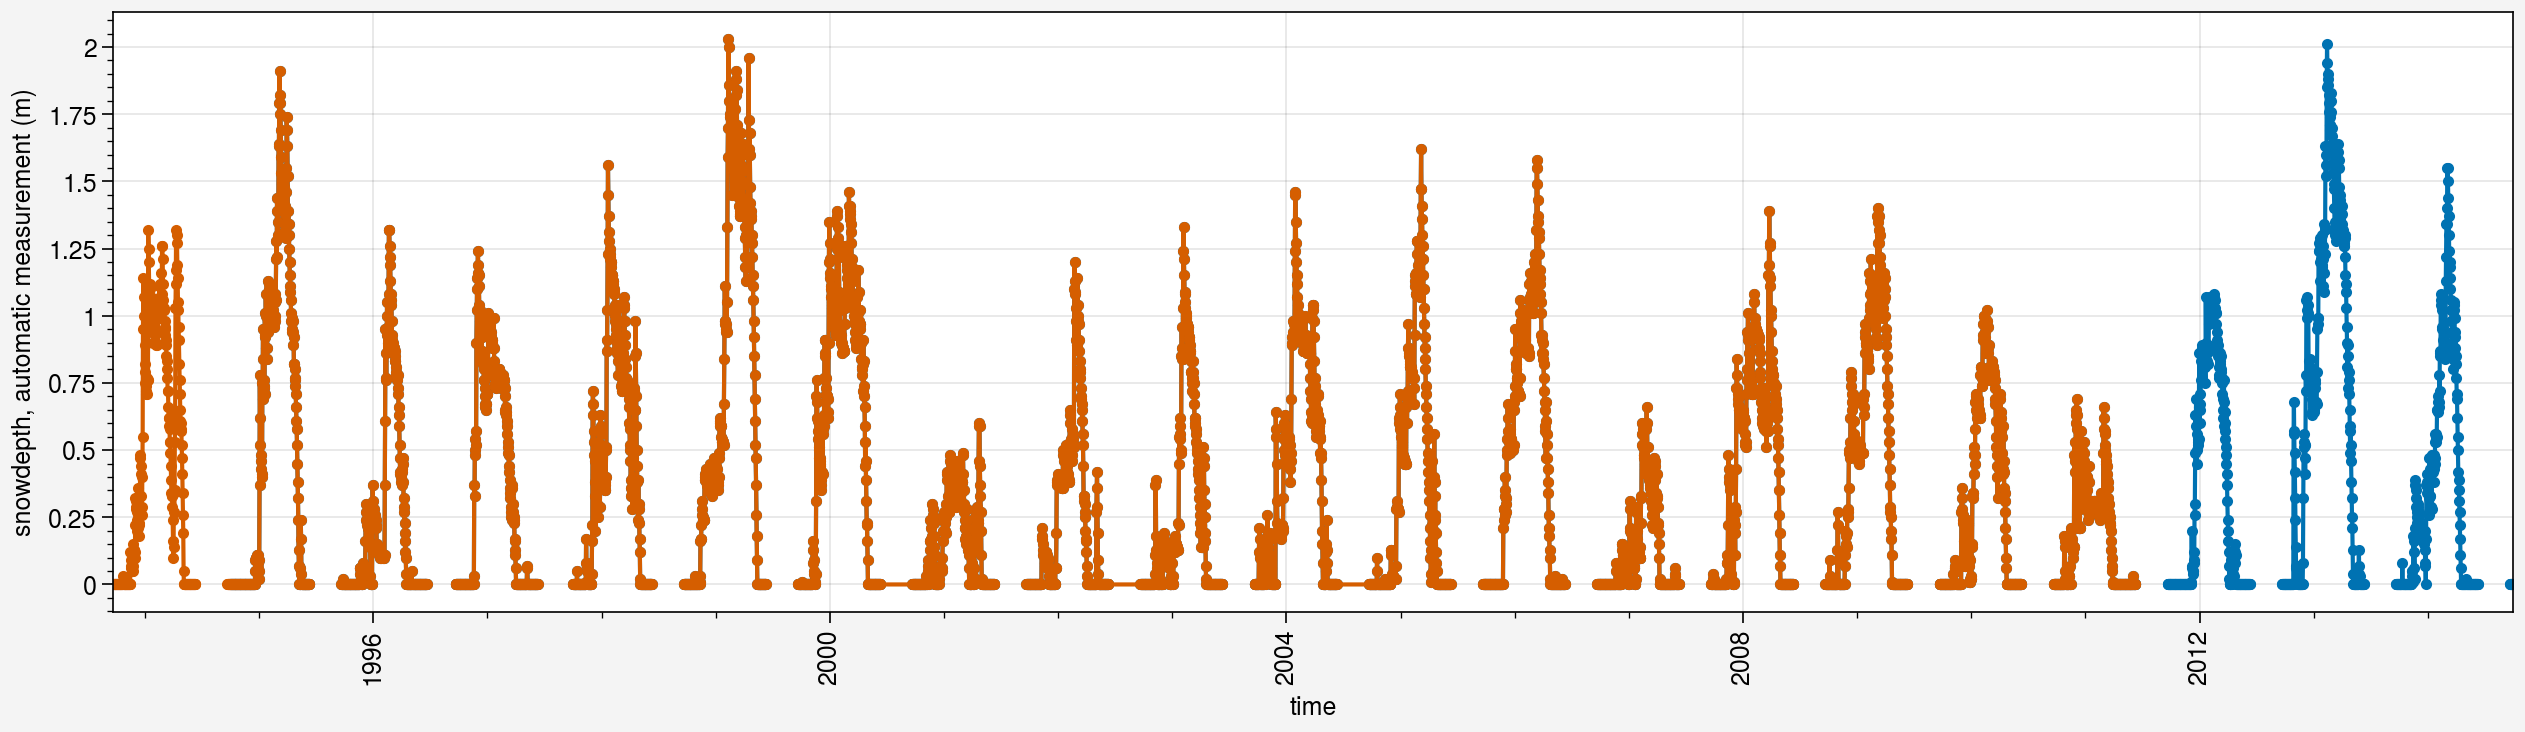

In [26]:
fig, axs = pplt.subplots(ncols=1, nrows=1, refaspect=4, refwidth=12, sharey=0)

axs[0].plot(df_h_eval_menard2019.snd_auto.resample(time='D').mean(), marker='.')
axs[0].plot(ds_d_eval_morin2012['Snow thick [m] (automated measurement, Ultra-...)'], marker='.')

In [27]:
fig, axs = pplt.subplots(ncols=1, nrows=1, refaspect=4, refwidth=12, sharey=0)

period=slice('1995','1996')

axs[0].plot(df_h_eval_menard2019.snd_auto.sel(time=period).resample(time='D').mean(), marker='.')
axs[0].plot(ds_d_eval_morin2012['Snow thick [m] (automated measurement, Ultra-...)'].sel(time=period), marker='.')

<a list of 1 Line2D objects>

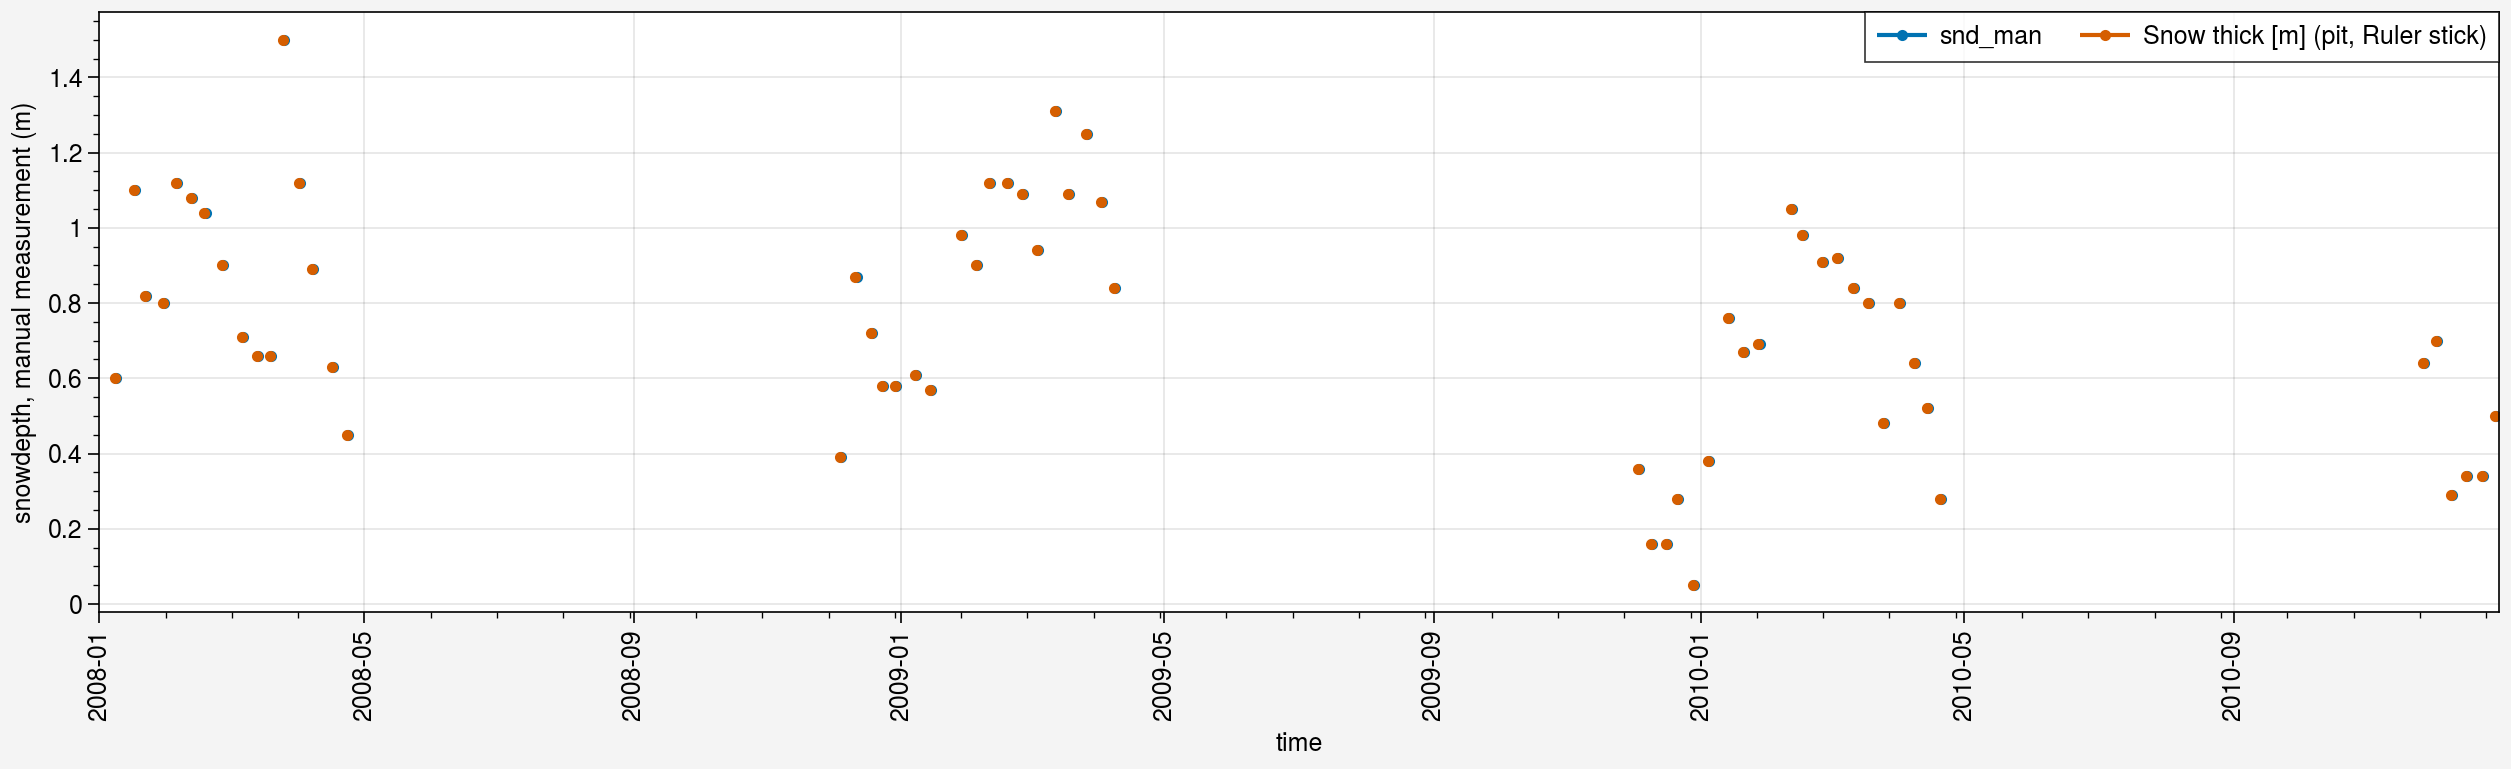

In [28]:
fig, axs = pplt.subplots(ncols=1, nrows=1, refaspect=4, refwidth=12, sharey=0)

period=slice('2008','2010')

axs[0].plot(df_h_eval_menard2019.snd_man.sel(time=period), marker='.', label='snd_man')
# axs[0].plot(ds_d_eval_morin2012['Snow thick [m] (pit north, Ruler stick)'].sel(time=period), marker='.', label='Snow thick [m] (pit north, Ruler stick)')
# axs[0].plot(ds_d_eval_morin2012['Snow thick [m] (pit south, Ruler stick)'].sel(time=period), marker='.', label='Snow thick [m] (pit south, Ruler stick)')
axs[0].plot(ds_d_eval_morin2012['Snow thick [m] (pit, Ruler stick)'].sel(time=period), marker='.', label='Snow thick [m] (pit, Ruler stick)')

axs[0].legend()

<mark>/!\ Menard et al. (2019) does not take into account the snow pit south and north. /!\ </mark>

## SWE

<a list of 1 Line2D objects>

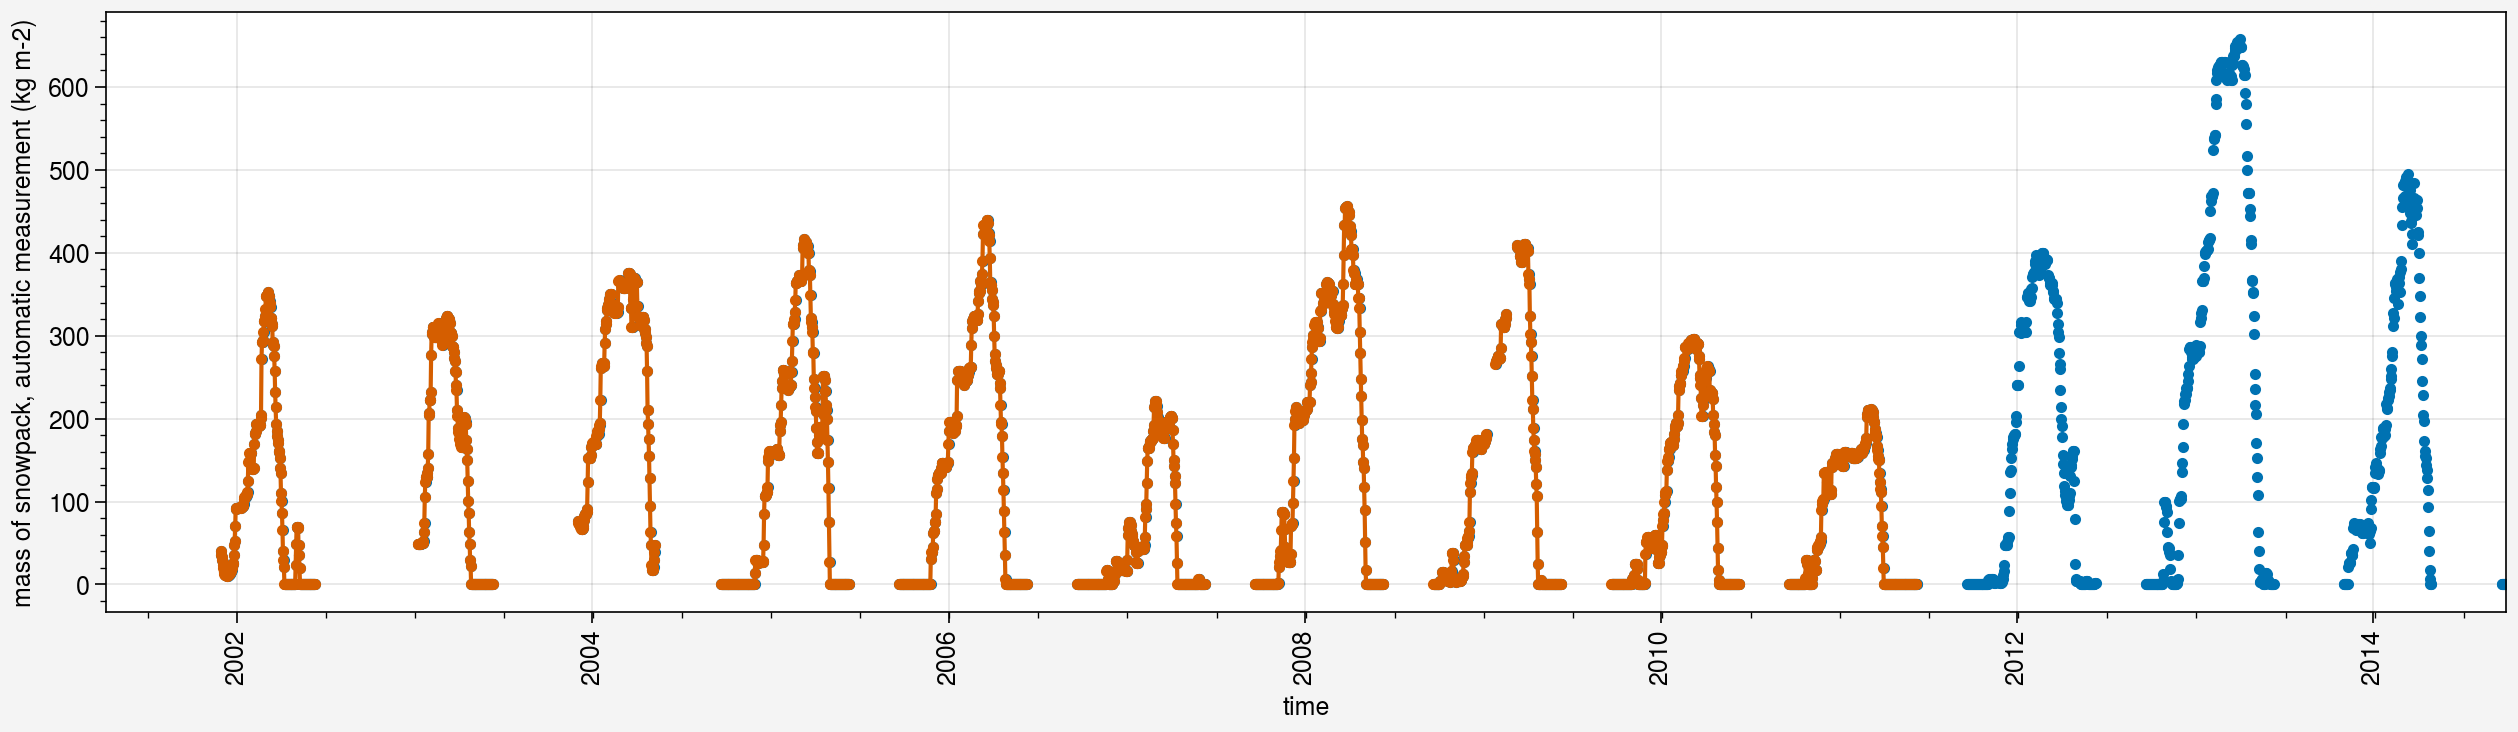

In [29]:
fig, axs = pplt.subplots(ncols=1, nrows=1, refaspect=4, refwidth=12, sharey=0)

axs[0].plot(df_h_eval_menard2019.snw_auto, marker='.')
axs[0].plot(ds_d_eval_morin2012['SWE [kg/m**2] (Cosmic Ray Counter, NRC)'], marker='.')

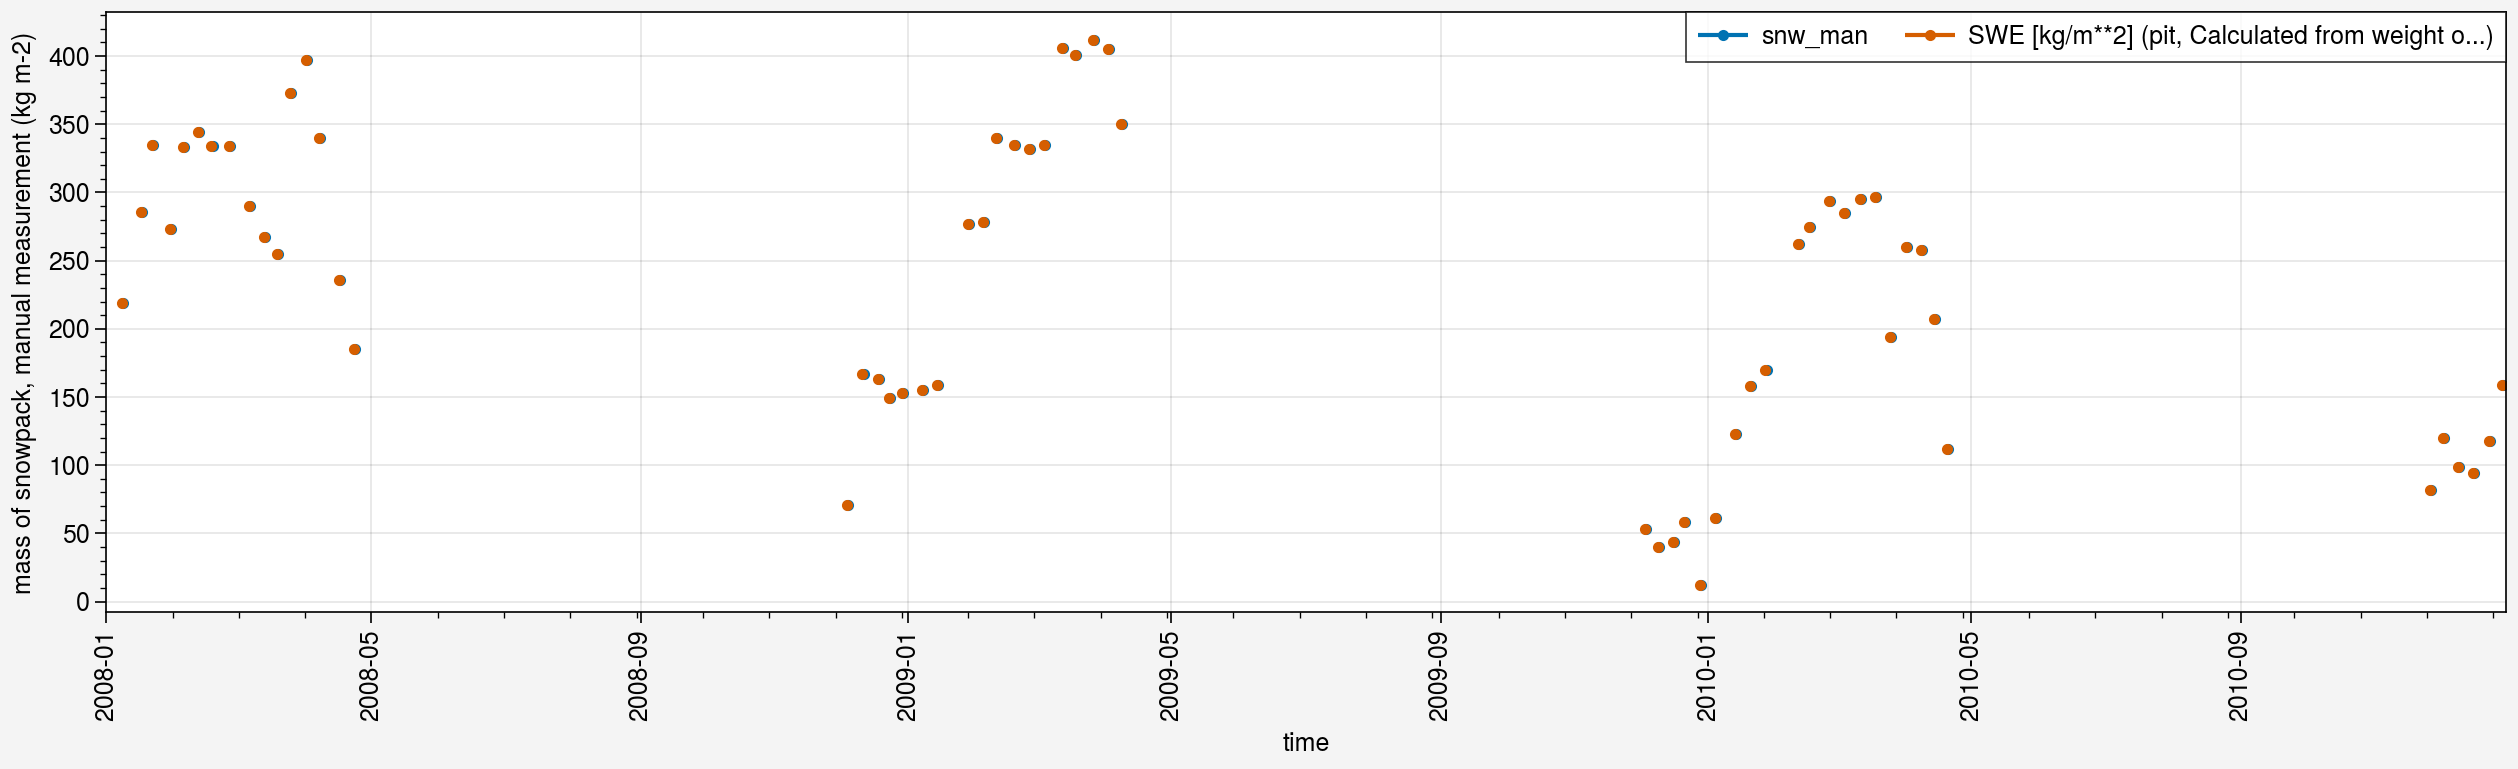

In [30]:
fig, axs = pplt.subplots(ncols=1, nrows=1, refaspect=4, refwidth=12, sharey=0)

period=slice('2008','2010')

axs[0].plot(df_h_eval_menard2019.snw_man.sel(time=period), marker='.', label='snw_man')
axs[0].plot(ds_d_eval_morin2012['SWE [kg/m**2] (pit, Calculated from weight o...)'].sel(time=period), marker='.', label='SWE [kg/m**2] (pit, Calculated from weight o...)')
# axs[0].plot(ds_d_eval_morin2012['SWE [kg/m**2] (pit north, Calculated from we...)'].sel(time=period), marker='.', label='SWE [kg/m**2] (pit, Calculated from weight o...)')
# axs[0].plot(ds_d_eval_morin2012['SWE [kg/m**2] (pit south, Calculated from we...)'].sel(time=period), marker='.', label='SWE [kg/m**2] (pit, Calculated from weight o...)')

axs[0].legend()

## Surface temperature

Surface temperature (Fig. 8a) and soil temperatures (Fig. 8b) are available at eight of the sites. Surface temperature was calculated from measured outgoing longwave radiation assuming black body radiation except at the Senator Beck basin sites, where infrared temperature sensors are used. The pyranometers measuring outgoing longwave radiation are above the snow cover at Col de Porte, Sapporo, and Weissfluhjoch and above the canopy at BERMS.

<a list of 1 Line2D objects>

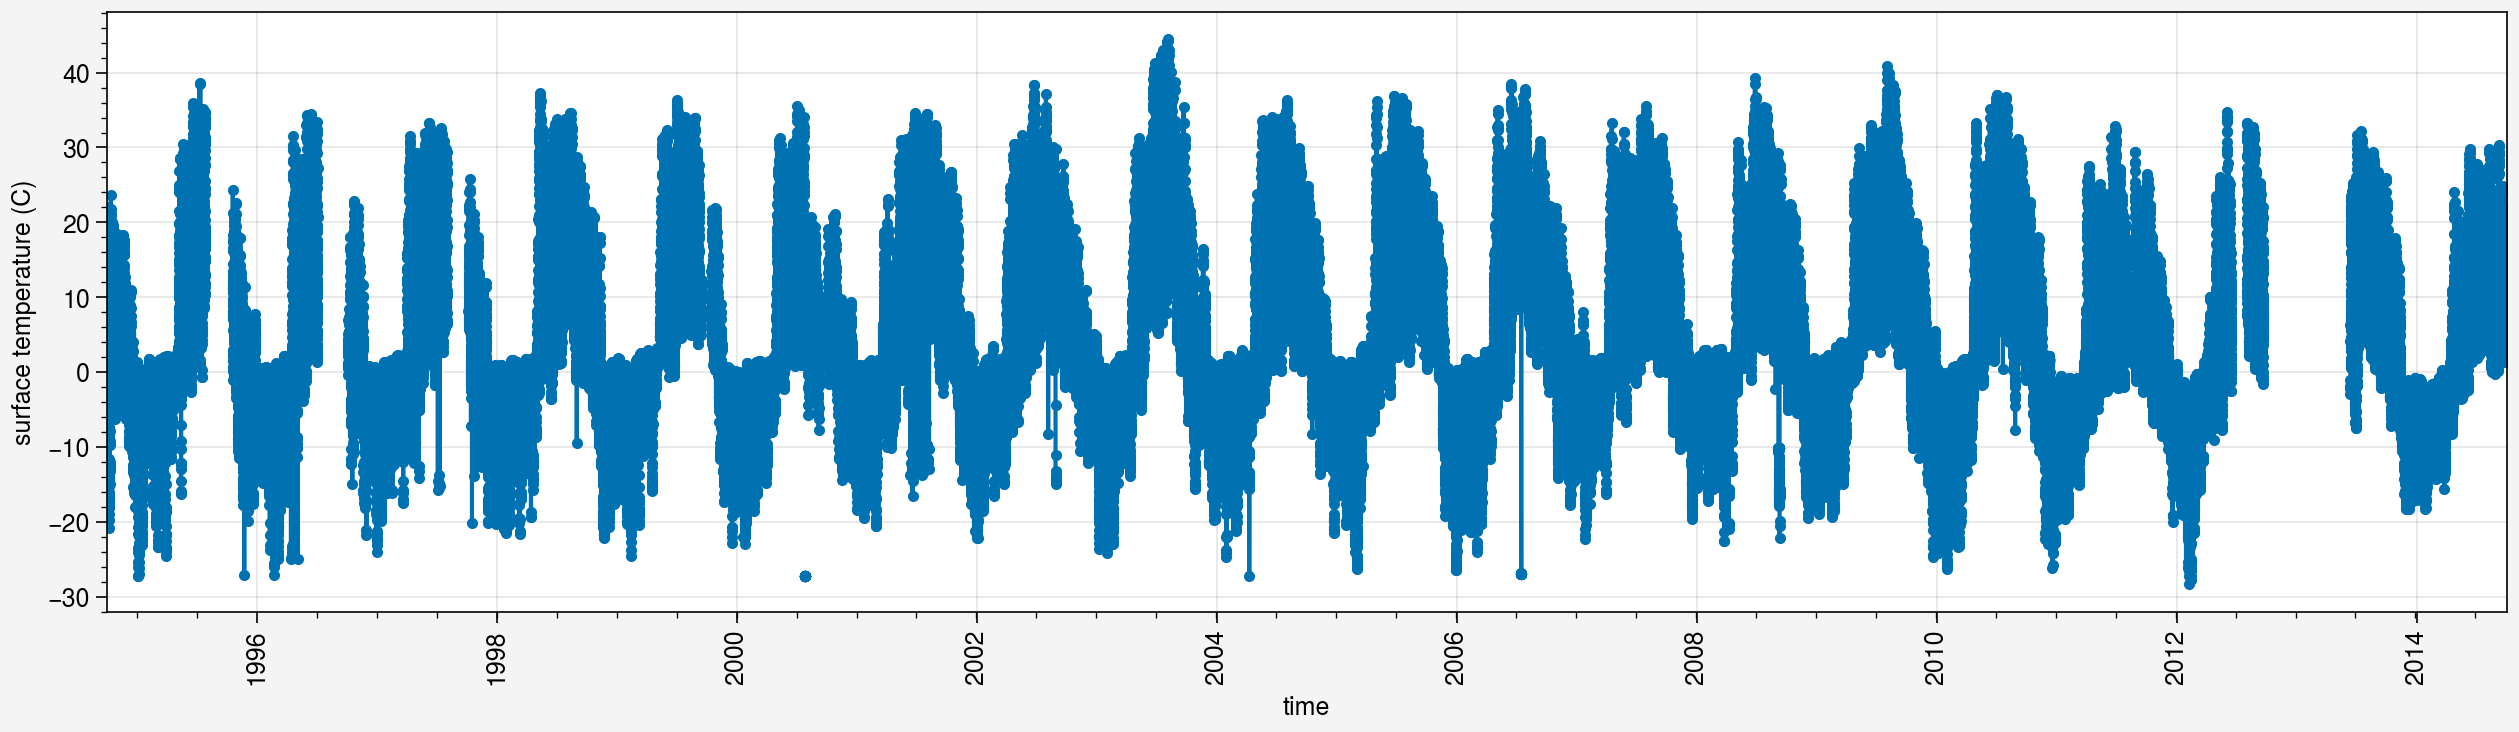

In [31]:
fig, axs = pplt.subplots(ncols=1, nrows=1, refaspect=4, refwidth=12, sharey=0)

axs[0].plot(df_h_eval_menard2019.ts, marker='.')
# axs[0].plot(ds_d_eval_morin2012['SWE [kg/m**2] (Cosmic Ray Counter, NRC)'], marker='.')

<a list of 1 Line2D objects>

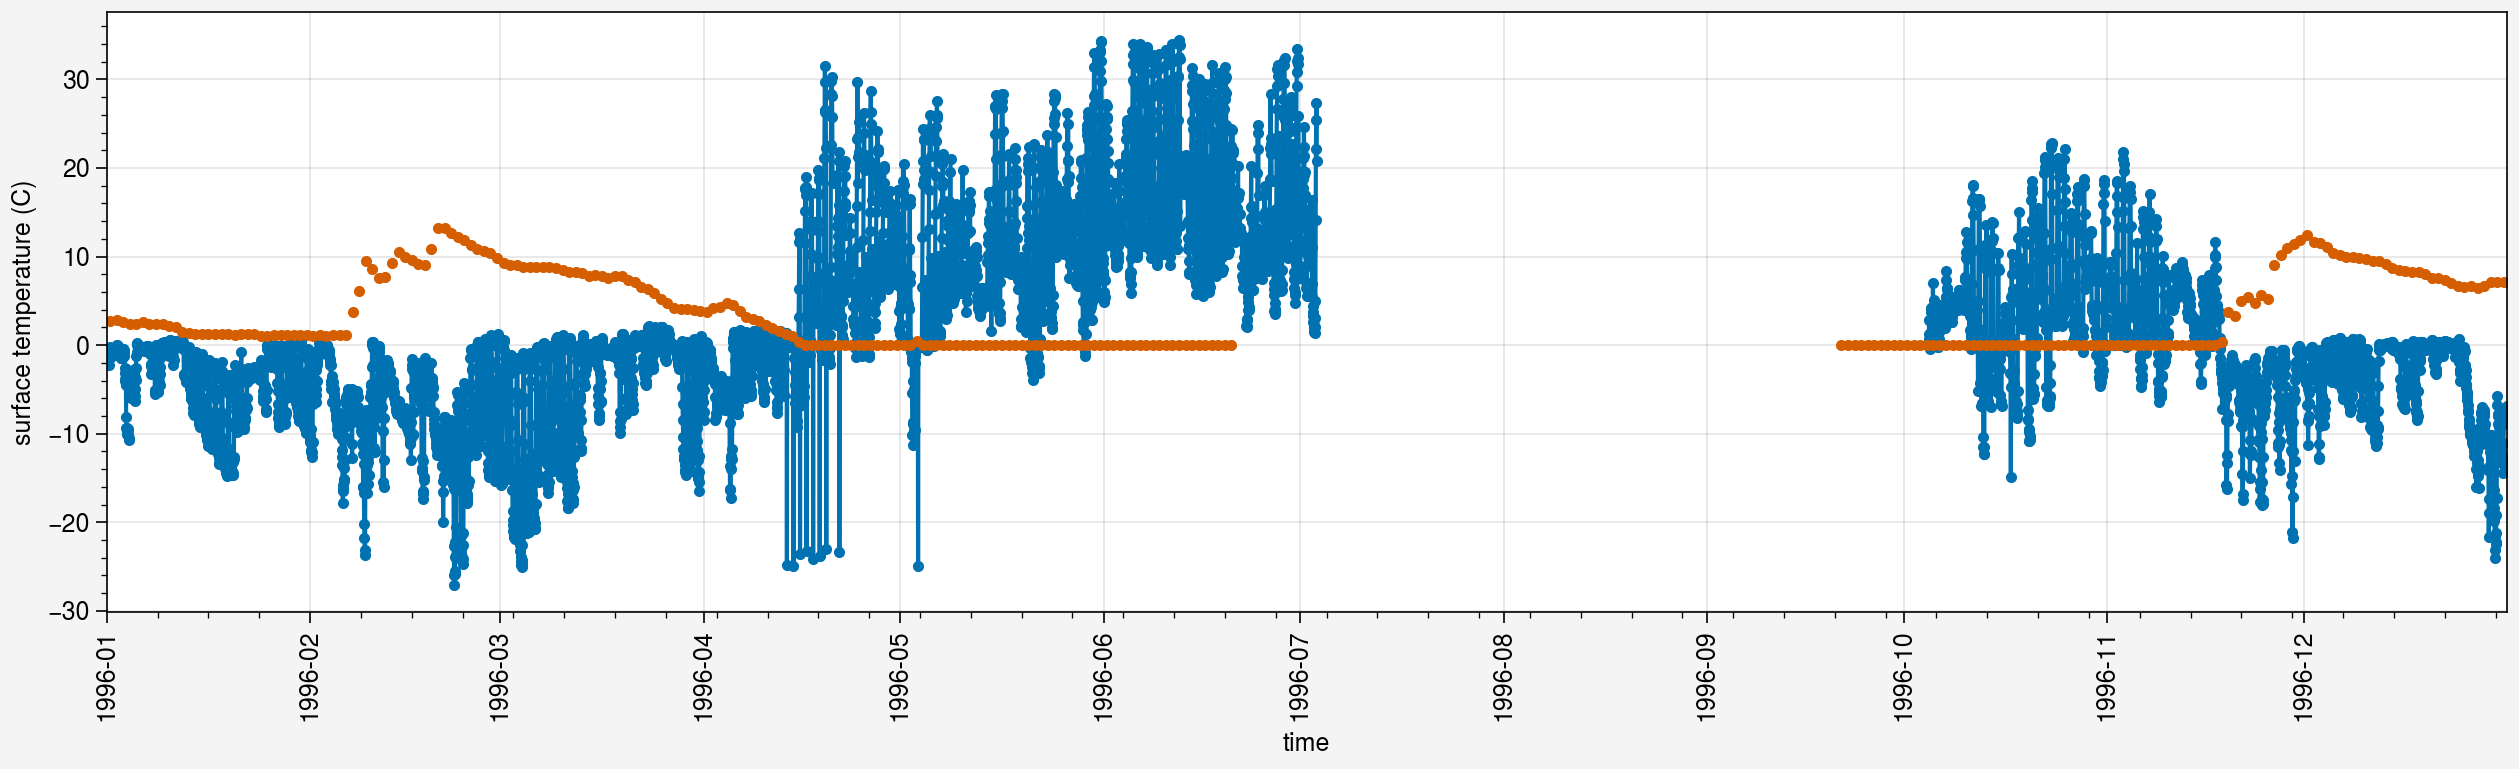

In [32]:
fig, axs = pplt.subplots(ncols=1, nrows=1, refaspect=4, refwidth=12, sharey=0)

axs[0].plot(df_h_eval_menard2019.ts.sel(time=slice('1996','1996')), marker='.')
axs[0].plot(df_h_eval_menard2019.snd_auto.sel(time=slice('1996','1996'))*10, marker='.')
# axs[0].plot(ds_d_eval_morin2012['SWE [kg/m**2] (Cosmic Ray Counter, NRC)'], marker='.')

## Albedo

<a list of 1 Line2D objects>

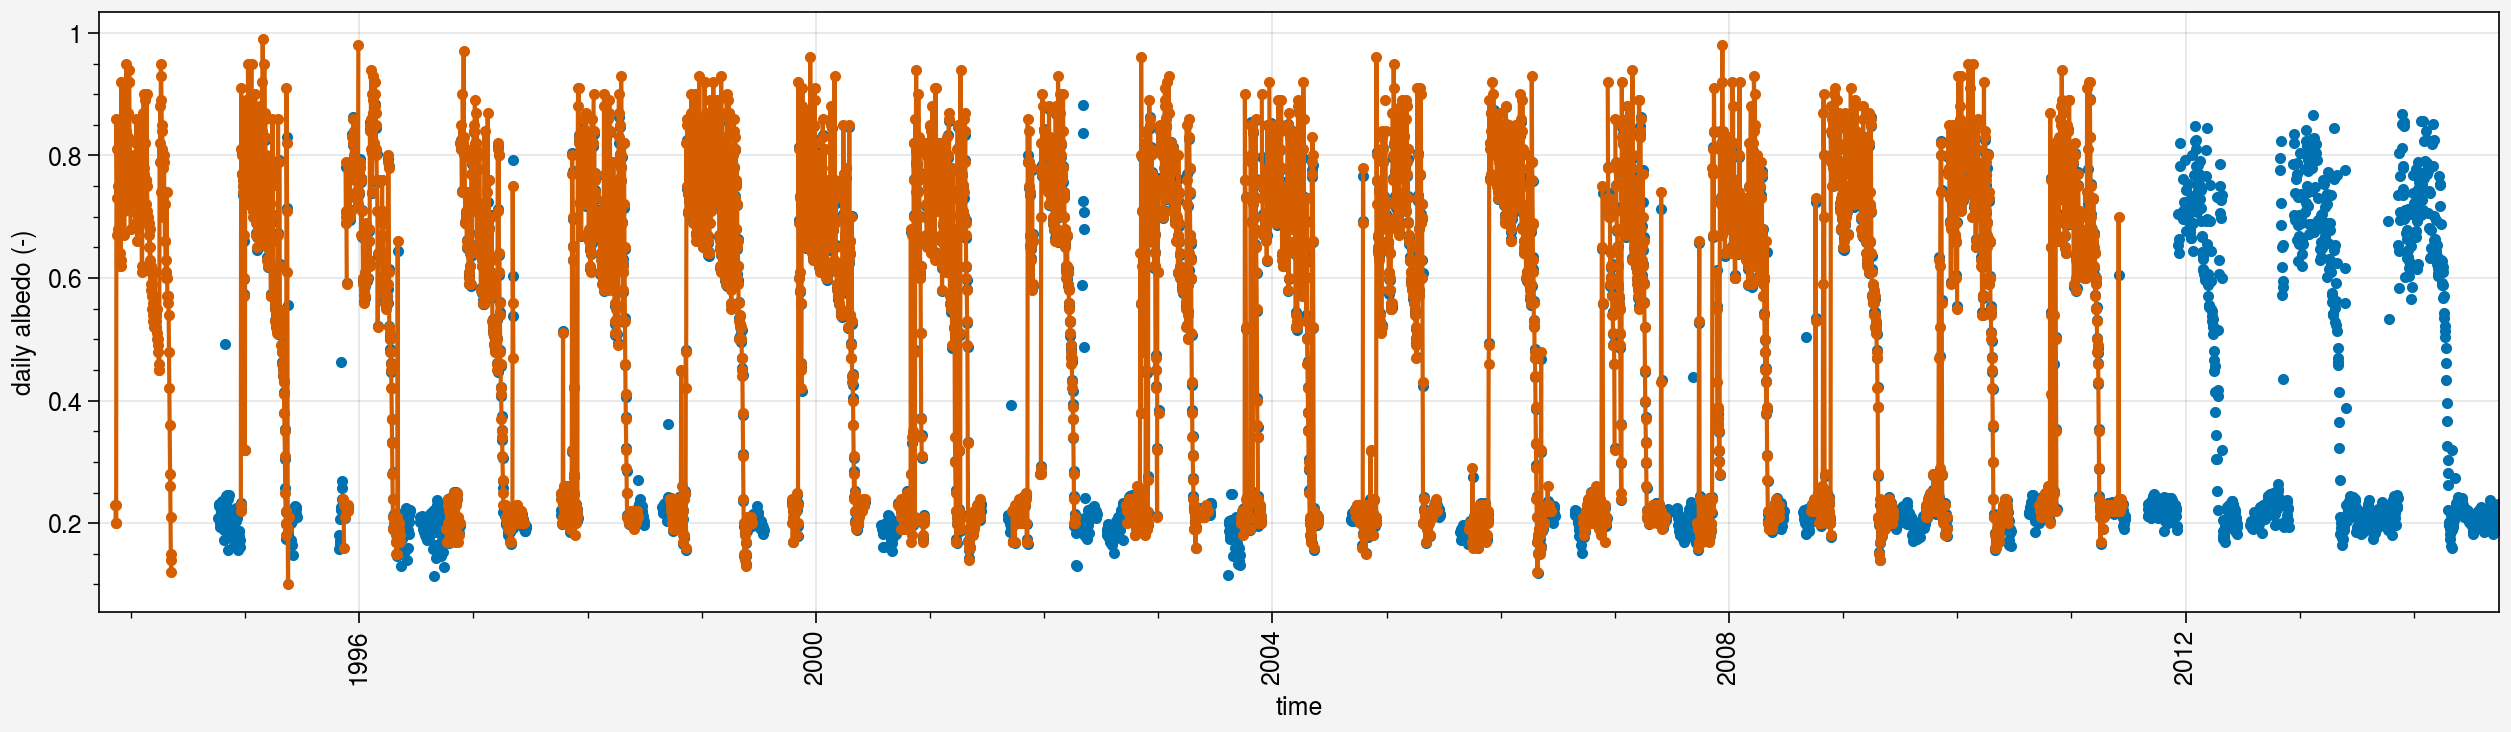

In [33]:
fig, axs = pplt.subplots(ncols=1, nrows=1, refaspect=4, refwidth=12, sharey=0)

axs[0].plot(df_h_eval_menard2019.albs, marker='.')
axs[0].plot(ds_d_eval_morin2012['Albedo [%] (Calculated)'], marker='.')

<a list of 1 Line2D objects>

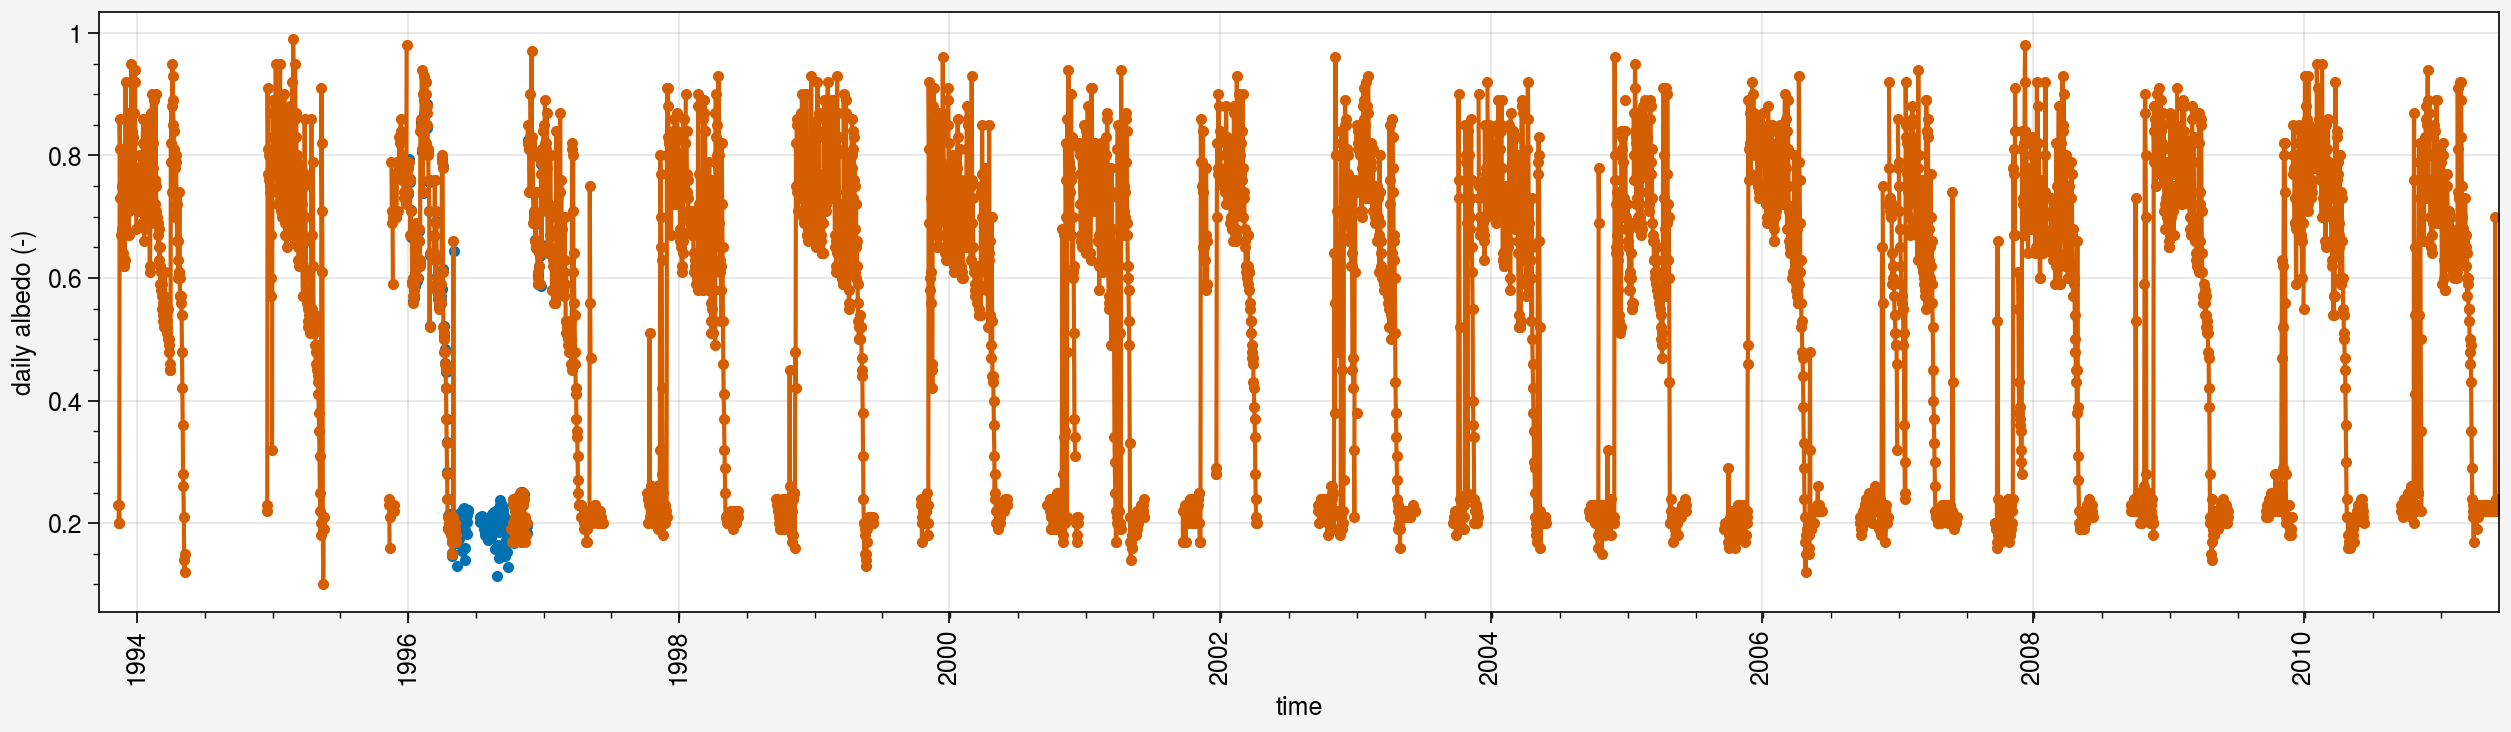

In [34]:
fig, axs = pplt.subplots(ncols=1, nrows=1, refaspect=4, refwidth=12, sharey=0)

axs[0].plot(df_h_eval_menard2019.albs.sel(time=slice('1996','1996')), marker='.')
axs[0].plot(ds_d_eval_morin2012['Albedo [%] (Calculated)'], marker='.')

## Soil temperature

<a list of 3 Line2D objects>

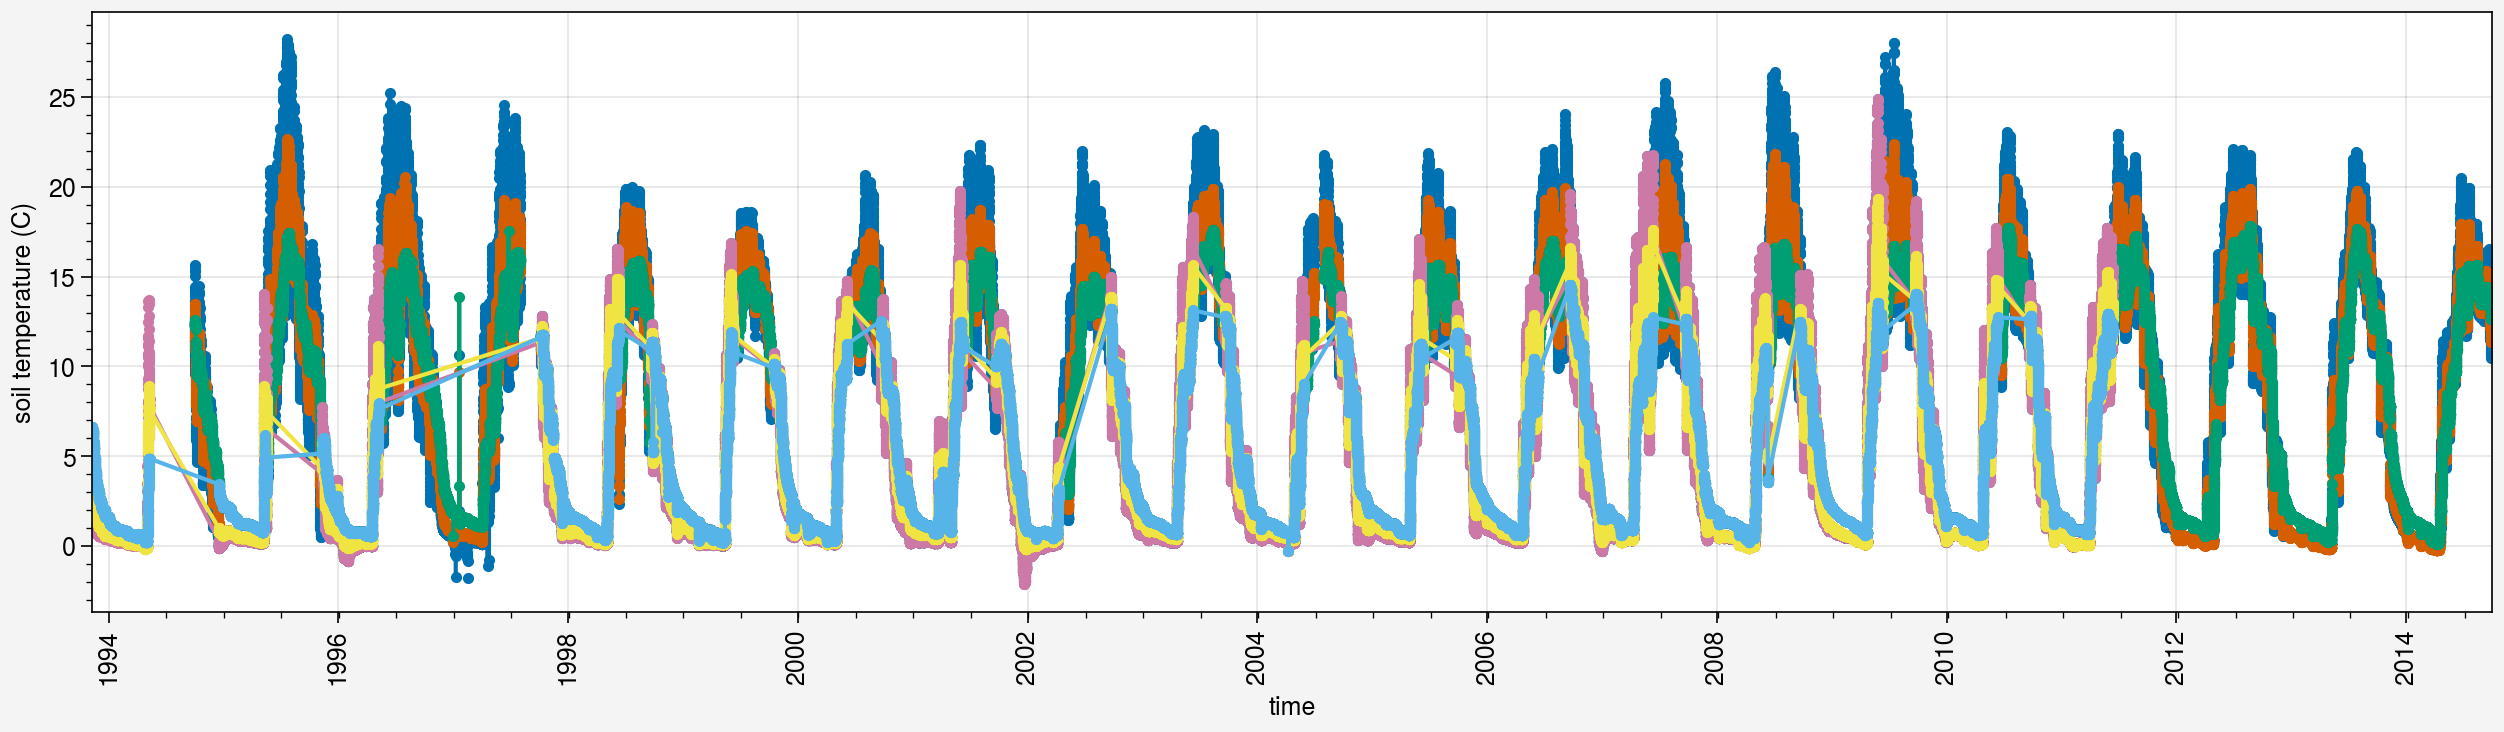

In [35]:
fig, axs = pplt.subplots(ncols=1, nrows=1, refaspect=4, refwidth=12, sharey=0)

axs[0].plot(df_h_eval_menard2019.tsl, marker='.')
axs[0].plot(ds_h_soilt_morin2012['t [°C]'], marker='.')

In [36]:
fig, axs = pplt.subplots(ncols=1, nrows=1, refaspect=4, refwidth=12, sharey=0)

axs[0].plot(df_h_eval_menard2019.tsl.sel(time=slice('1996','1996')), marker='.')
axs[0].plot(ds_h_soilt_morin2012['t [°C]'].sel(time=slice('1996','1996')), marker='.')

<a list of 3 Line2D objects>

# Lejeune2019

## Snow Depth

In [37]:
path_lejeune2019

'/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/CRYOBSCLIM_CDP'

In [38]:
ds_h_eval_lejeune2019 = xr.open_dataset(path_lejeune2019+'/CRYOBSCLIM.CDP.2018.HourlySnow.nc')
ds_d_eval_lejeune2019 = xr.open_dataset(path_lejeune2019+'/CRYOBSCLIM.CDP.2018.MetSnowDaily.nc')
ds_h_eval_lejeune2019

<xarray.Dataset>
Dimensions:                   (time: 254208)
Coordinates:
  * time                      (time) datetime64[ns] 1993-08-01 ... 2022-07-31...
Data variables: (12/70)
    Soil_temperature_10cm     (time) float64 ...
    Soil_temperature_20cm     (time) float64 ...
    Soil_temperature_50cm     (time) float64 ...
    Runoff_5m2                (time) float64 ...
    Runoff_1m2                (time) float64 ...
    Snow_depth                (time) float64 ...
    ...                        ...
    Soil_moisture_10cm_2      (time) float64 ...
    Soil_moisture_10cm_3      (time) float64 ...
    Soil_moisture_20cm_1      (time) float64 ...
    Soil_moisture_20cm_2      (time) float64 ...
    Soil_moisture_30cm_1      (time) float64 ...
    Soil_moisture_30cm_2      (time) float64 ...
Attributes:
    history:  Thu Feb  9 11:25:20 2023: ncrcat CDP_hourly_19930801_20170731.n...
    NCO:      netCDF Operators version 4.9.1 (Homepage = http://nco.sf.net, C...

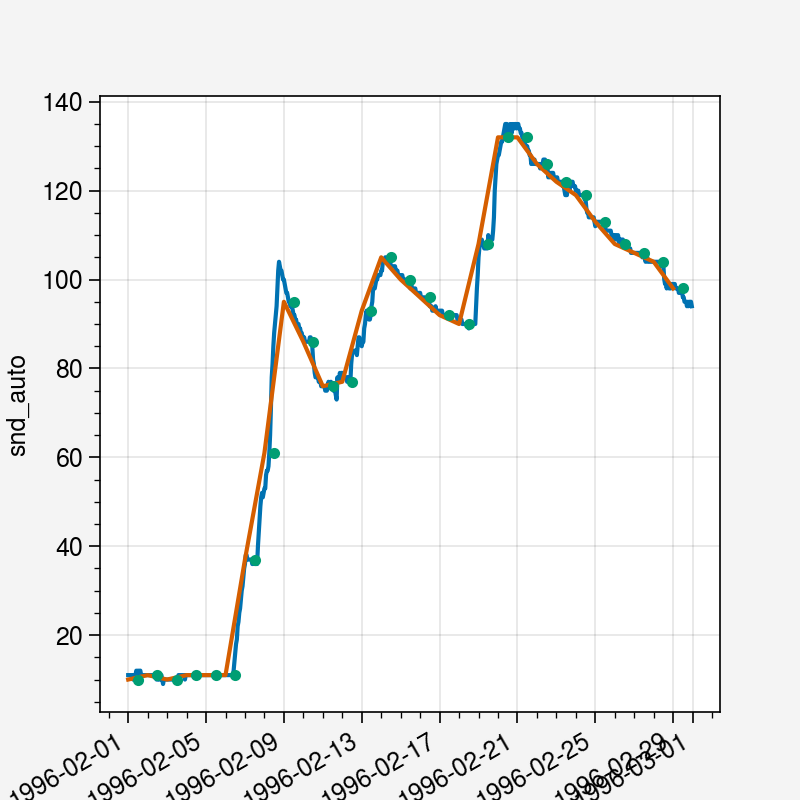

In [39]:
ds_h_eval_lejeune2019.Snow_depth.sel(time='1996-02').plot()
(ds_d_eval_lejeune2019.snow_depth_auto.sel(time='1996-02')*100).plot()
(df_h_eval_menard2019.snd_auto.sel(time='1996-02')*100).plot(marker='.')

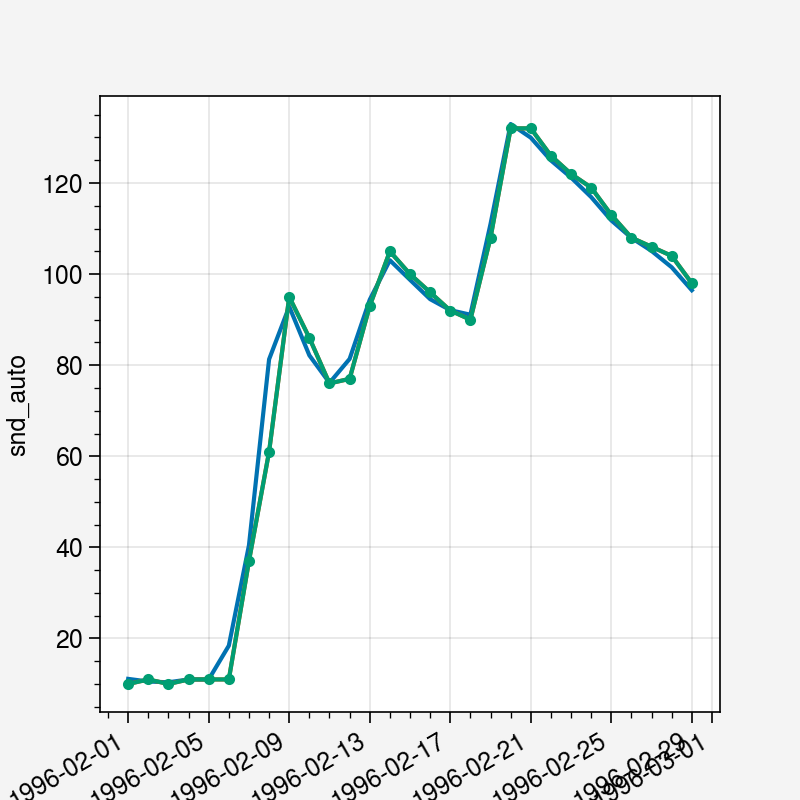

In [40]:
ds_h_eval_lejeune2019.Snow_depth.sel(time='1996-02').resample(time='D').mean().plot()
(ds_d_eval_lejeune2019.snow_depth_auto.sel(time='1996-02')*100).plot()
(df_h_eval_menard2019.snd_auto.sel(time='1996-02')*100).resample(time='D').mean().plot(marker='.')

In [41]:
(ds_h_eval_lejeune2019.Surface_temperature-273.15).sel(time='2000-01').plot()
df_h_eval_menard2019.ts.sel(time='2000-01').plot()

## Snow profiles

In [1]:
from snowpyt import pit_class as pc


Loading metadata... 

[<DOM Element: caaml:timePosition at 0x14a94467de10>]
[<DOM Element: caaml:name at 0x14a94467e050>, <DOM Element: caaml:name at 0x14a94467e200>]
no data in this field
no data in this field
no data in this field
[<DOM Element: caaml:position at 0x14a94467e5f0>]
no data in this field
no data in this field
no data in this field
Total snowpit depth = 115.0
layer # 0
{'dtop': 115.0, 'dtop_unit': 'cm', 'dbot': 114.0, 'thickness': 1.0, 'thickness_unit': 'cm', 'grain_type1': 'SH', 'grain_type2': None, 'grain_type3': None, 'grainSize_unit': None, 'grainSize_mean': None, 'grainSize_max': None, 'hardness_ram': None, 'hardness_index': None, 'hardness': None, 'lwc': None, 'id': None}
layer # 1
{'dtop': 114.0, 'dtop_unit': 'cm', 'dbot': 87.0, 'thickness': 27.0, 'thickness_unit': 'cm', 'grain_type1': 'PP', 'grain_type2': None, 'grain_type3': None, 'grainSize_unit': None, 'grainSize_mean': 0.5, 'grainSize_max': None, 'hardness_ram': 19.3, 'hardness_index': 1, 'hardness': 'F', 'l

/home/lalandmi/github/snowpyt/snowpyt/pit_class.py:499: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels_ax, rotation=45)
/home/lalandmi/miniconda3/envs/sc2_v0/lib/python3.10/site-packages/matplotlib/cm.py:344: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


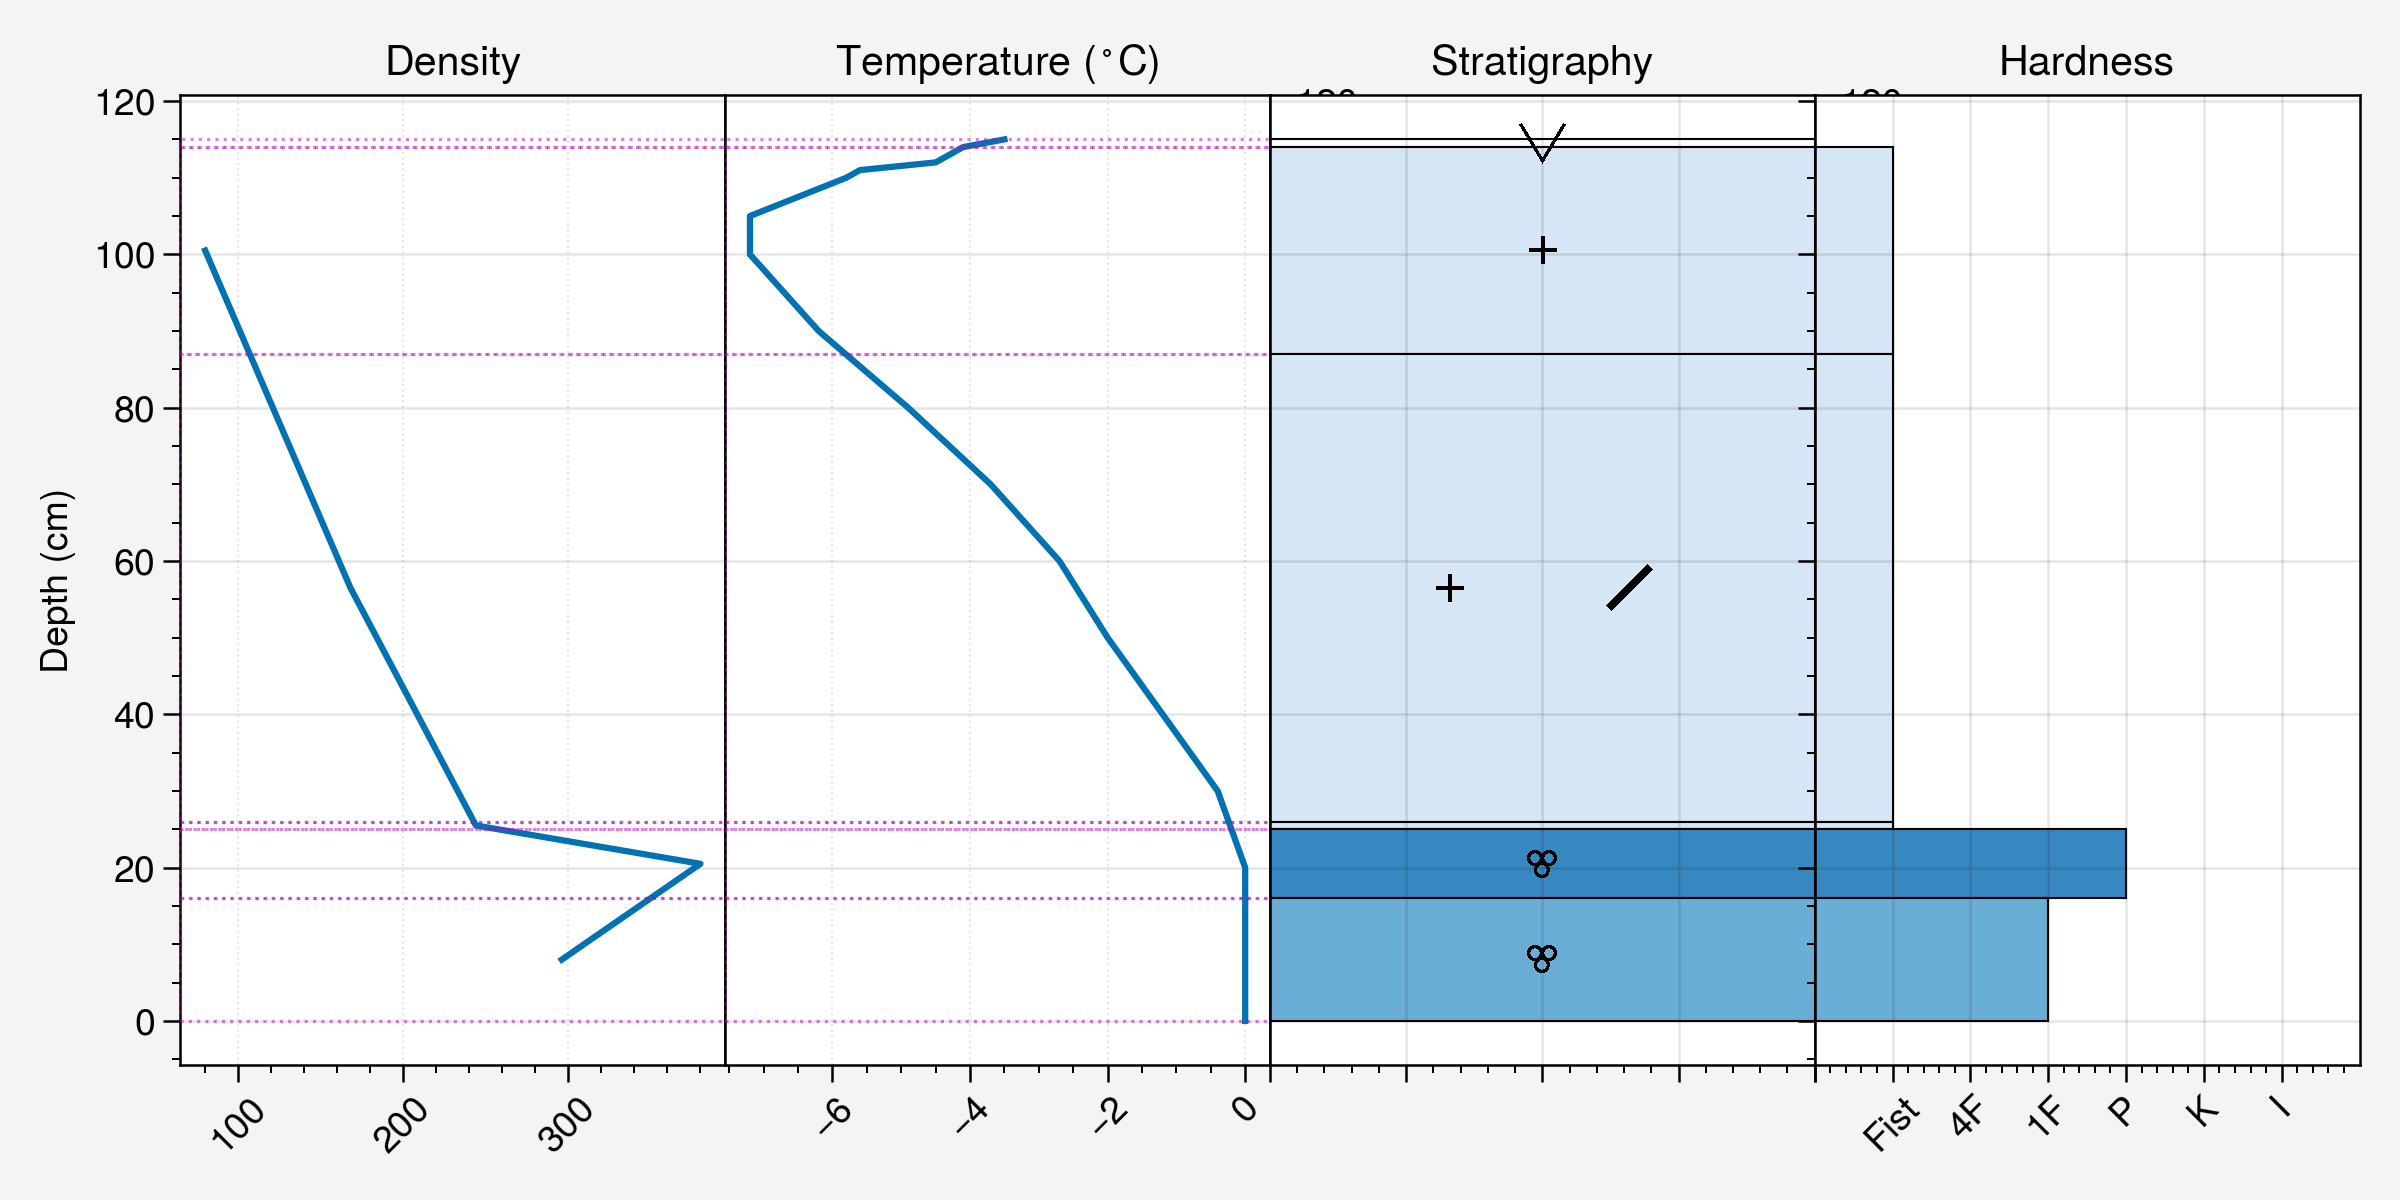

In [47]:
p = pc.Snowpit()
p.caaml_file = path_lejeune2019+'/CRYOBSCLIM.CDP.2018.SnowProfile/SnowProfile/colDePorte_199312271300.caaml'
p.import_caamlv6()
p.plot(plot_order=['density', 'temperature', 'stratigraphy', 'hardness'])

In [55]:
p.density_profile.density

array([ 80., 168., 244., 380., 296.])

In [56]:
p.density_profile.depth

array([100.5,  56.5,  25.5,  20.5,   8. ])

In [60]:
p.temperature_profile.temp

array([-3.5, -4.1, -4.3, -4.5, -5.6, -5.8, -7.2, -7.2, -6.2, -4.9, -3.7,
       -2.7, -2. , -1.2, -0.4,  0. ,  0. ,  0. ])